# Maîtrisez les possibilités offertes par Matplotlib
[Aller au cours OpenClassrooms](https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Création d'un graphique basique

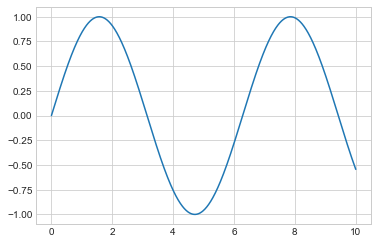

In [2]:
# Pour rappel, linspace() retourne des N valeurs équitablement réparties entre min et max.
# On s'en sert ici afin d'avoir des valeurs régulières de x pour tracer notre graphique.
x = np.linspace(0, 10, 1000)

plt.style.use('seaborn-whitegrid')
first_graph = plt.plot(x, np.sin(x))

C'est bien beau mais **la taille de police est trop petite pour un rapport**. 

 On va donc chercher à augmenter cela pour avoir un rendu plus clair.

## Modification des paramètres de base du graphique

<ipython-input-3-b98a34d9b65f>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0.5, 0, 'x'), Text(0, 0.5, 'sin(x)')]

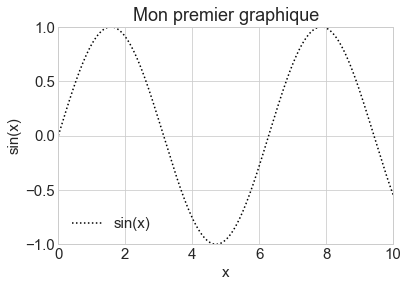

In [3]:
# La modification des paramètres de pyplot sera effective pour TOUS les graph tracés après cette ligne
plt.rcParams.update({
    'font.size': 15
})

# On peut également changer des paramètres directement au sein du graphique
plt.style.use('seaborn-whitegrid')
plt.plot(x, np.sin(x), color='black', linestyle='dotted', label='sin(x)')

# Et on peut également modifier les échelles sur les 2 axes
plt.axis([0, 10, -1, 1])

# On définit un titre et l'emplacement de la légende
plt.title('Mon premier graphique')
plt.legend(loc='lower left')

# Pour des modifications poussées sur les axes (légendes, notamment) on doit travailler un object "axes"
ax = plt.axes()
ax.set(xlabel='x', ylabel='sin(x)')

## Superposer des graphiques
On peut évidemment tracer plusieurs graphiques sur les mêmes axes.

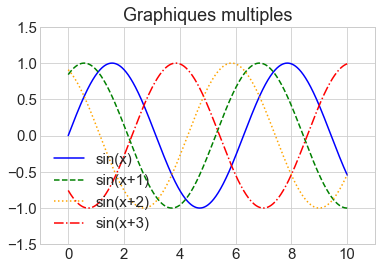

In [4]:
# Pour cela on définit une figure
fig1 = plt.figure()
ax1 = plt.axes()

plt.style.use('seaborn-whitegrid')
plt.plot(x, np.sin(x), color='blue', linestyle='solid', label='sin(x)')
plt.plot(x, np.sin(x+1), color='green', linestyle='dashed', label='sin(x+1)')
plt.plot(x, np.sin(x+2), color='orange', linestyle='dotted', label='sin(x+2)')
plt.plot(x, np.sin(x+4), color='red', linestyle='dashdot', label='sin(x+3)')

plt.axis([-1, 11, -1.5, 1.5]);
plt.title("Graphiques multiples")
plt.legend(loc='lower left');
ax1 = ax.set(xlabel='x', ylabel='sin(x)')

## Représentation de l'erreur (delta) sur un graphique
Parfois les valeurs qu'on représente ne sont pas parfaitement définies, mais possède une marge d'erreur.

Matplotlib nous permet d'afficher ces points avec leur marge d'erreur pour plus de clarté.

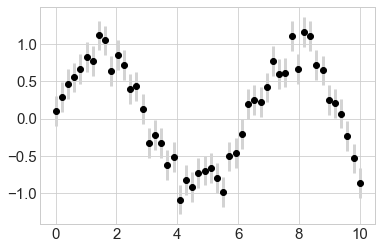

In [5]:
# On définit un nouveau domaine avec moins de points
x1 = np.linspace(0, 10, 50)

# On définit notre delta
dy = 0.2

# Pour chaque point, le delta sera pondéré aléatoirement en utilisant une loi normale
y1 = np.sin(x1) + dy * np.random.randn(50)

# On trace le graphique
plt.style.use('seaborn-whitegrid')
plt.errorbar(x1, y1, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In [6]:
# Le style peut être modifié. On peut consulter les styles en affichant le paramètre suivant : 
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Afficher plusieurs graphiques sur la même figure

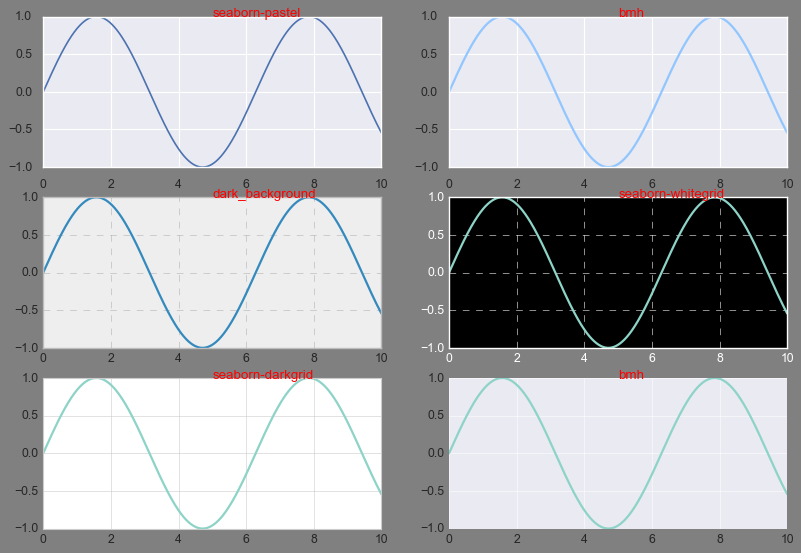

In [10]:
# On va tracer le même graphique avec plusieurs styles différents sur la même figure
# On définit la figure avec sa taille en inches
fig = plt.figure(figsize=(12,8), facecolor='grey')

x2 = np.linspace(0, 10, 1000)
y2 = np.sin(x)

for i in range(6):
    # i commence à 0 mais les graphiques de matplotlib doivent commencer à 1 (héritage de matlab) d'où le i+1
    style_index = np.random.randint(0, len(plt.style.available))
    fig.add_subplot(3, 2, i+1)
    plt.style.use(plt.style.available[style_index])
    plt.plot(x2, y2)
    plt.text(s=plt.style.available[style_index], x=5, y=1, color='red')
    

## Réaliser de beaux graphiques avec Seaborn
[Aller au cours](https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/5559011-realisez-de-beaux-graphiques-avec-seaborn)

Seaborn est une surcouche de Matplotlib qui ajoute des fonctionnalités statistiques et améliore les styles

In [11]:
# Commençons par importer Seaborn
import seaborn as sns
sns.set()

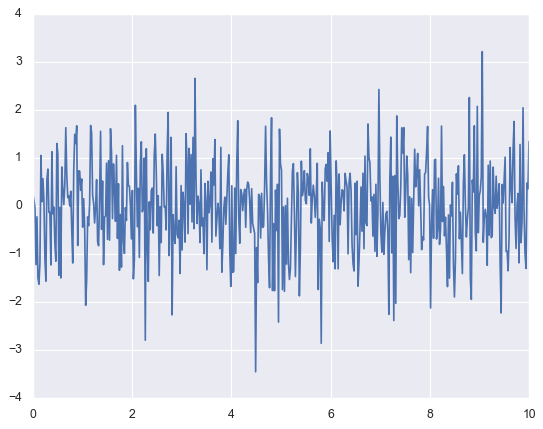

In [12]:
# Et créons notre premier graphique simple
x = np.linspace(0, 10, 500)
y = np.random.randn(500)
plt.plot(x, y)

### Fonctions statistiques de Searborn
Seaborn offre quelques fonctions statistiques permettant facilement de représenter des données afin de les explorer.

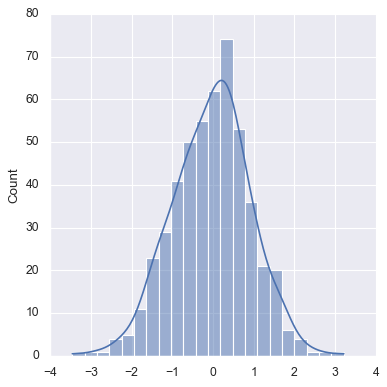

In [17]:
y_random = np.random.rand(500)

# On demande à Seaborn de nous afficher la distribution de la variable
# L'option kde demande à Seaborn de nous afficher la tendance de la distribution
sns.displot(y, kde=True)

#### Utilisation du jeu de données Iris

In [18]:
# Importons le jeu de données Iris fourni par Seaborn
# Il s'agit d'un jeu de données qui fournit des informations sur les pétales de 3 espèces d'iris
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

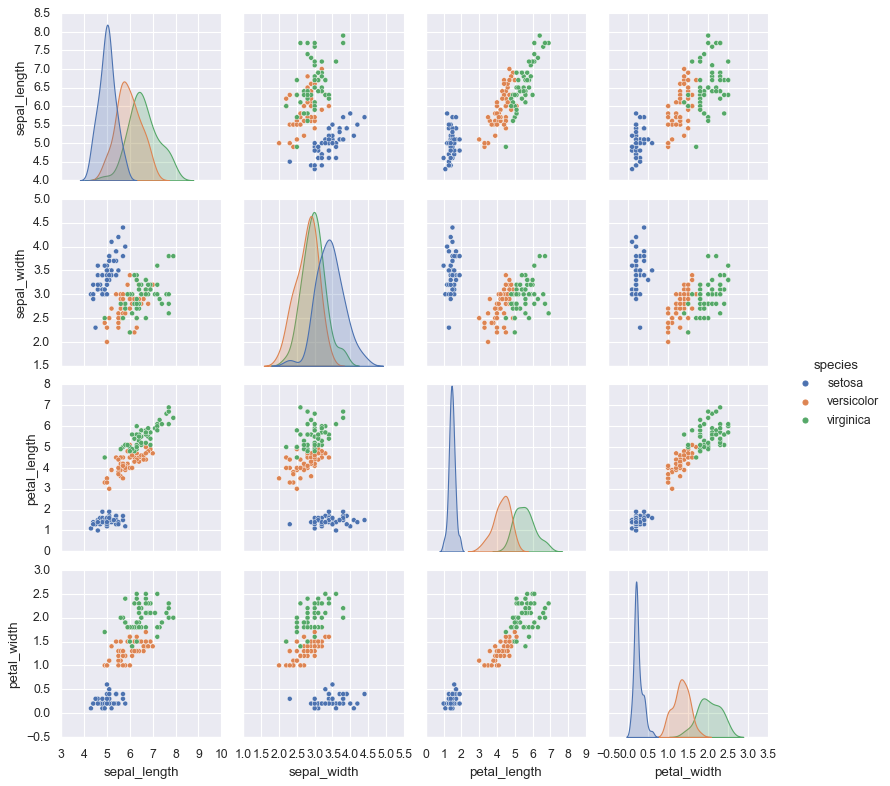

In [20]:
# Seaborn peut nous tracer tous les graphiques liant nos données pour qu'on puisse
# les étudier et voir si certaines tendances apparaissent
sns.pairplot(iris, hue='species', height=2.5)

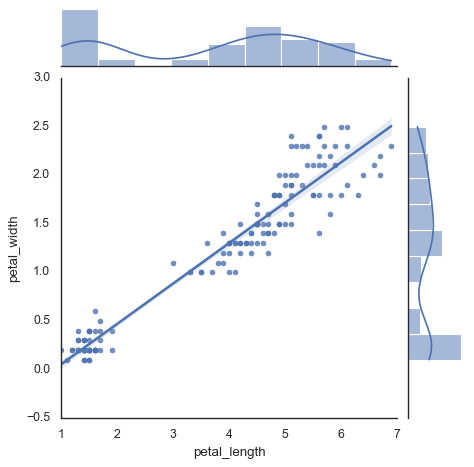

In [23]:
# On peut également afficher deux données l'une par rapport à l'autre
with sns.axes_style('white'):
    sns.jointplot(x="petal_length", y="petal_width", data=iris, kind='reg')